<a href="https://colab.research.google.com/github/aggelospsiris/NB-KNN-SMV/blob/main/svm_best_param_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/drive')
df=pd.read_csv('/drive/My Drive/Colab Notebooks/decision_theory/processed_data.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Split into input and output
X = df.values[:, :-1]
Y = df.values[:, -1]
#normalization between [-1 1]
#a = np.array(X)
#X = 2.*(a - np.min(a))/np.ptp(a)-1

#For finding the best c and gamma i normalized my data with standard scaler cause 
#when i normalized them in [-1,1] svc return the same accuracy with different gammas and c
#cause probably the weights during training stayied the same with the input between [-1,1]
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#SEARCH FOR THE BEST C IN [1-200] WITH STEP=5 AND USING LINEAR 
#split data for train and test
accuracy_best=0
c_best= 1
accuracy_list = []
c_list = []
for c in range(1, 200, 5) :
  model = SVC(C=c,kernel='linear')
  model.fit(X_train, y_train)
  y_pred_SVC = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
  print(accuracy)
  c_list.append(c)
  accuracy_list.append(accuracy)
  if accuracy > accuracy_best:
    accuracy_best = accuracy
    c_best = c
    print("Current best accuracy :",accuracy)
    print("Current best C :",c_best)
   

0.7435897435897436
Current best accuracy : 0.7435897435897436
Current best C : 1
0.7350427350427351
0.7521367521367521
Current best accuracy : 0.7521367521367521
Current best C : 11
0.7521367521367521
0.7777777777777778
Current best accuracy : 0.7777777777777778
Current best C : 21
0.7606837606837606
0.7692307692307693
0.7350427350427351
0.7435897435897436
0.7777777777777778
0.7350427350427351
0.7435897435897436
0.7606837606837606
0.717948717948718
0.7692307692307693
0.7008547008547008
0.7435897435897436
0.7435897435897436
0.7521367521367521
0.7350427350427351
0.7606837606837606
0.7606837606837606
0.7094017094017094
0.7264957264957265
0.7777777777777778
0.7094017094017094
0.7094017094017094
0.7521367521367521
0.7777777777777778
0.7435897435897436
0.7094017094017094
0.717948717948718
0.7435897435897436
0.7350427350427351
0.717948717948718
0.7264957264957265
0.7435897435897436
0.7350427350427351
0.7435897435897436
0.7435897435897436


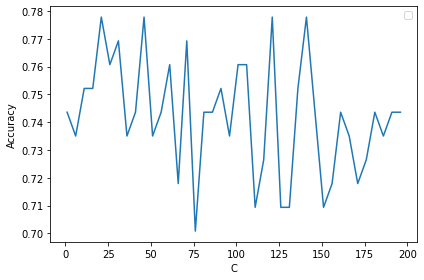

In [ ]:
from matplotlib import pyplot
#Plots
pyplot.figure(0)
pyplot.plot(c_list, accuracy_list)
pyplot.ylabel("Accuracy")
pyplot.xlabel("C")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [ ]:
#SEARCH FOR THE BEST GAMMA IN [0:10] WITH STEP 0.5 AND WITH RBF
from sklearn.svm import SVC
from sklearn import metrics
accuracy_best=0
g_best= 0.5
accuracy_list = []
g_list = []
for g in np.arange(0.5, 10, 0.5) :
  model = SVC(C=c_best,gamma=g,kernel='rbf')
  model.fit(X_train, y_train)
  y_pred_SVC = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
  print(accuracy)
  g_list.append(g)
  accuracy_list.append(accuracy)
  if accuracy > accuracy_best:
    accuracy_best = accuracy
    g_best = g
    print("Current best accuracy :",accuracy)
    print("Current best gamma :",g_best)

0.7863247863247863
Current best accuracy : 0.7863247863247863
Current best gamma : 0.5
0.7692307692307693
0.7606837606837606
0.7264957264957265
0.7264957264957265
0.7264957264957265
0.7264957264957265
0.717948717948718
0.7094017094017094
0.717948717948718
0.717948717948718
0.7264957264957265
0.7264957264957265
0.7264957264957265
0.717948717948718
0.7264957264957265
0.7264957264957265
0.7264957264957265
0.7350427350427351


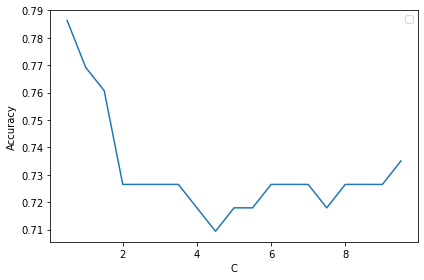

In [ ]:
from matplotlib import pyplot
#Plots
pyplot.figure(0)
pyplot.plot(g_list, accuracy_list)
pyplot.ylabel("Accuracy")
pyplot.xlabel("C")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()